## 1. Downloading Custom dataset

In [ ]:
# Get Data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path('data/')
img_path = data_path/'pizza_steak_sushi'

# Check on folder exist or not
if img_path.is_dir():
  print(f'folder path is exist')

else :
  print(f'Creating {img_path}, wait.........')
  img_path.mkdir(parents=True, exist_ok=True)

# Download DataSet
with open(data_path/'pizza_steak_sushi.zip', 'wb') as file:
  requests = requests.get('https://raw.githubusercontent.com/es-OmarHani/pytorch-deep-learning/main/data/pizza_steak_sushi.zip')
  print('Downloading dataset ...............')
  file.write(requests.content)

# Unzip data
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_file:
  print(f"Extracting dataset foler .............")
  zip_file.extractall(img_path)

Creating data/pizza_steak_sushi, wait.........
Extracting dataset foler .............


## Beocming One with Data

### **Part 1**

*   walk_through_data will be implemented


In [ ]:
import os

# walk through on data
def walk_through_data(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} dirs and {len(filenames)} in {dirpath}")

# Show our data
walk_through_data(img_path)

There are 2 dirs and 0 in data/pizza_steak_sushi
There are 3 dirs and 0 in data/pizza_steak_sushi/train
There are 0 dirs and 75 in data/pizza_steak_sushi/train/steak
There are 0 dirs and 78 in data/pizza_steak_sushi/train/pizza
There are 0 dirs and 72 in data/pizza_steak_sushi/train/sushi
There are 3 dirs and 0 in data/pizza_steak_sushi/test
There are 0 dirs and 19 in data/pizza_steak_sushi/test/steak
There are 0 dirs and 25 in data/pizza_steak_sushi/test/pizza
There are 0 dirs and 31 in data/pizza_steak_sushi/test/sushi


### **Part 2**

*   Visualize our data with randomness Using **`PIL and matplotlib`**



In [ ]:
from PIL import Image
import random


# Visualize random img
def show_img_random(dir_path):
  # 1. Get all images
  img_path_list = list(img_path.glob('*/*/*.jpg'))

  # 2. choose random image
  random_img = random.choice(img_path_list)

  # 3. Get images Class
  img_class = random_img.parent.stem

  # 4. show img
  img = Image.open(random_img)

  print(f'Image path  : {random_img}')
  print(f'Image class : {img_class}')

  return img_path_list, img

# Show images random
img_path_list, img = show_img_random(img_path)

Image path  : data/pizza_steak_sushi/train/steak/1257104.jpg
Image class : steak


## Transforming Data (Turning img into tensors)

In [ ]:
                                      import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Write a transform function
data_transoform = transforms.Compose([
    # resize_img
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Visualize transofrmed data
def plot_transformed_images(img_paths:list,
                         transform,
                         n = 3,
                         seed = None):
  if seed:
    random.seed(seed)

  # Get paths of selected number of paths
  rand_images_paths = random.sample(img_paths, k=n)

  for rand_img_path in rand_images_paths:
    with Image.open(rand_img_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)

      # First img
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Second img
      transformed_img = data_transoform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"transformed_img \nSize: {transformed_img.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {rand_img_path.parent.stem}", fontsize=16)

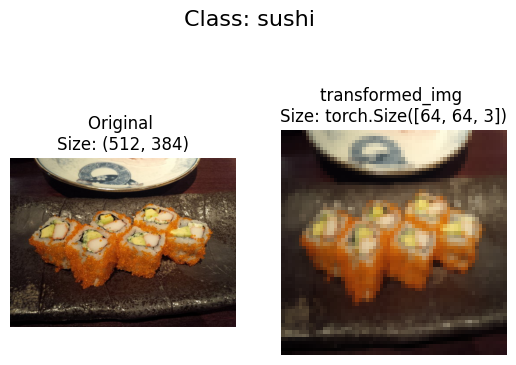

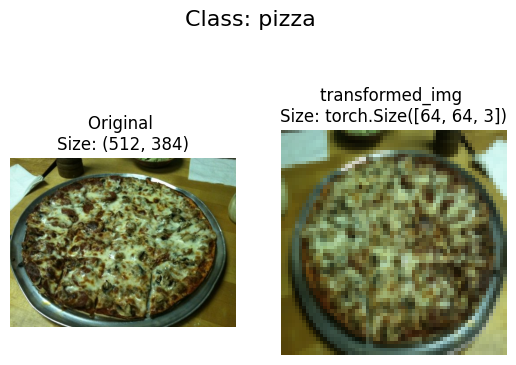

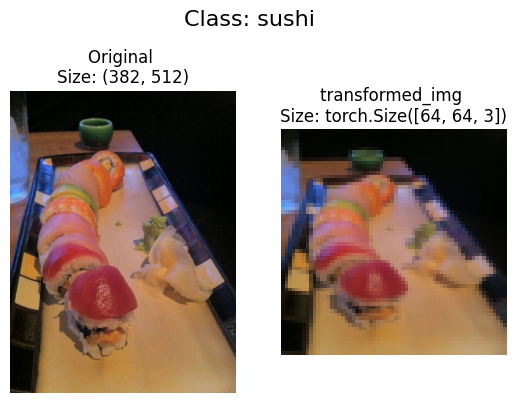

In [ ]:
plot_transformed_images(img_path_list,
                        transform=data_transoform,
                        n=3)

## Use Image Folder to Create datasets

In [ ]:
from torchvision import datasets

# Directories
train_dir = '/content/data/pizza_steak_sushi/train'
test_dir = '/content/data/pizza_steak_sushi/test'

# creating datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transoform,
                                  target_transform= None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transoform,
                                  target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /content/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /content/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get classes
class_names = train_data.classes

# Get classes as dict
class_dict = train_data.class_to_idx

class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Visualize loaded Image Folder data

In [ ]:
# Index a batch from dataset
img, label = next(iter(train_data))
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [ ]:
# Some pritings
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


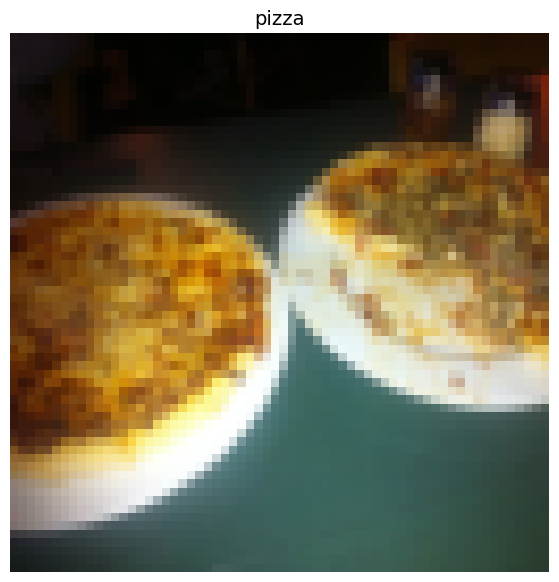

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## Use DataLoader to Create Data batches

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ca6bbe78e50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ca6bbe7bdc0>)

In [ ]:
# Get sample
img, label = next(iter(train_dataloader))
print(f'img_shape   : {img.shape}')
print(f"label_shape : {label} ")


img_shape   : torch.Size([32, 3, 64, 64])
label_shape : tensor([1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        0, 0, 2, 2, 1, 1, 1, 1]) 


## Create Image Folder Custom

### Create Method for get classes of directory

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create method for ImageFolderCustom

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

## Creating datasets with Custom ImagefolderCustom


In [ ]:
# Create Transformers
train_transformer = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

# Test Our Image Folder Custom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transformer)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transformer)

train_data_custom, test_data_custom


(<__main__.ImageFolderCustom at 0x7ca6bfd97040>,
 <__main__.ImageFolderCustom at 0x7ca6bfd945e0>)

In [ ]:
# check on attributes
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
train_data_custom[0][0]

tensor([[[0.3961, 0.3882, 0.4118,  ..., 0.9569, 0.9569, 0.9569],
         [0.2353, 0.3373, 0.4314,  ..., 0.9412, 0.9569, 0.9569],
         [0.2706, 0.3569, 0.4824,  ..., 0.6863, 0.8314, 0.9412],
         ...,
         [0.7412, 0.7373, 0.7333,  ..., 0.1961, 0.8196, 0.9490],
         [0.7373, 0.7373, 0.7333,  ..., 0.1412, 0.7255, 0.9569],
         [0.7373, 0.7373, 0.7373,  ..., 0.1059, 0.5882, 0.9529]],

        [[0.3686, 0.3059, 0.2980,  ..., 0.8902, 0.8902, 0.8863],
         [0.2078, 0.2588, 0.3804,  ..., 0.8667, 0.8902, 0.8902],
         [0.2667, 0.3686, 0.5490,  ..., 0.5451, 0.7255, 0.8627],
         ...,
         [0.6902, 0.6941, 0.6941,  ..., 0.1529, 0.7608, 0.8588],
         [0.6902, 0.6902, 0.6941,  ..., 0.0980, 0.6667, 0.8745],
         [0.6902, 0.6902, 0.6863,  ..., 0.0588, 0.5294, 0.8824]],

        [[0.0824, 0.1020, 0.1569,  ..., 0.8431, 0.8471, 0.8471],
         [0.0431, 0.0863, 0.1490,  ..., 0.8078, 0.8471, 0.8471],
         [0.0863, 0.1137, 0.1451,  ..., 0.4196, 0.6471, 0.

## Explore State of Art Augmentation with `torchvision transforms`

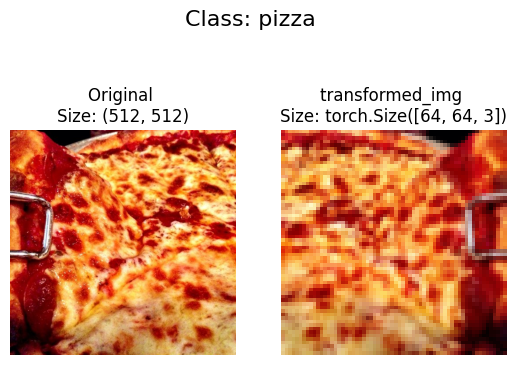

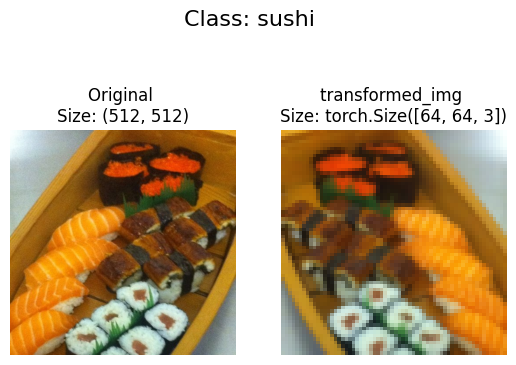

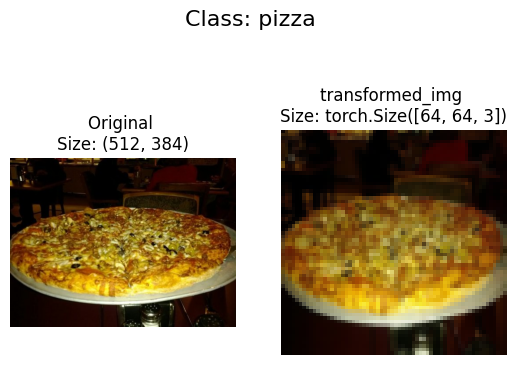

In [ ]:
# create transformers of augmentation
train_transformes = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=2),
    transforms.ToTensor()
])

test_transformes = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

# plot transormed imgs
plot_transformed_images(img_paths=img_path_list,
                        transform=train_transformes,
                        n=3,
                        seed=None)


## Building a Baseline Model

1.   Loading and Transforming Data
2.   Replicating TinyVGG



### 1. Loading and Transforming Data

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Create transofermers
simple_transformer = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

# Load and Transoform
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transformer)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transformer)


# Turn dataset into DataLoader
BATCH_SIZE = 32
NUM_OF_WORKERS = os.cpu_count()

# Create DataLoader
train_dataloader = DataLoader(dataset=train_data_simple,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_OF_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data_simple,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_OF_WORKERS,
                              shuffle=False)



2. Building Baseline Model _ Replicating Ting VGG

In [ ]:
# crate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Get image batch
img, label = next(iter(train_dataloader))

# Try a forward pass
model_0(img.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

### Using torch_info for summary model

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### Creating train, test functions

#### 1. train function

In [ ]:
# Create train fn
def train_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optim:torch.optim,
               device:device = device):

  # Put Model in train mode
  model.train()

  # setup loss and acc
  train_loss, train_acc = 0, 0

  # loop through dataloader for batches
  for batch, (X_train, y_train) in enumerate(dataloader):

    # put on device
    X_train, y_train = X_train.to(device), y_train.to(device)

    # 1. Forward pass
    y_pred = model(X_train)
    # print(f'shape of y_pred : {y_pred.shape}')

    # 2. loss
    loss = loss_fn(y_pred, y_train)
    train_loss += loss.item()

    # 3. zero optim
    optim.zero_grad()

    # 4. loss backword
    loss.backward()

    # 5. optim step
    optim.step()

    # calc acc
    y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_classes == y_train).sum().item() / len(y_pred)

  # Adjust metrics to avg
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc


#### 2. Test funciton

In [ ]:
# Create train fn
def test_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               device:device = device):

  # Put Model in train mode
  model.eval()

  # setup loss and acc
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    # loop through dataloader for batches
    for batch, (X_test, y_test) in enumerate(dataloader):

      # put on device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      y_pred = model(X_test)
      # print(f'shape of y_pred : {y_pred.shape}')

      # 2. loss
      loss = loss_fn(y_pred, y_test)
      test_loss += loss.item()

      # calc acc
      y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_classes == y_test).sum().item() / len(y_pred)

  # Adjust metrics to avg
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc



### Craeting a Method that will make train, test both togehther

In [ ]:
from tqdm.auto import tqdm

# Create train fn
def train(model,
          train_dataloader,
          test_dataloader,
          optim,
          loss_fn,
          epochs=5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optim=optim)
        test_loss, test_acc = test_step(model=model,
                              dataloader=test_dataloader,
                              loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results


### Training, Evaluating Model

In [ ]:
# Set random seeds
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optim=optim,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1342 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 5.472 seconds


### Plotting Loss Curves

In [ ]:
model_0_results

{'train_loss': [1.1078356355428696,
  1.0846451073884964,
  1.115256279706955,
  1.099038541316986,
  1.098887950181961],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.2890625, 0.29296875],
 'test_loss': [1.1362075010935466,
  1.1621689001719158,
  1.1694835027058919,
  1.1342012882232666,
  1.1433659394582112],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

In [ ]:
def plot_loss_curves(results:Dict[str, list[float]]):
  # Get loss
  train_loss = results['train_loss']
  test_loss = results['test_loss']

  # Get acc
  train_acc = results['train_acc']
  test_acc = results['test_acc']

  # get epochs
  epochs = range(len(train_loss))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label='train_accuracy')
  plt.plot(epochs, test_loss, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

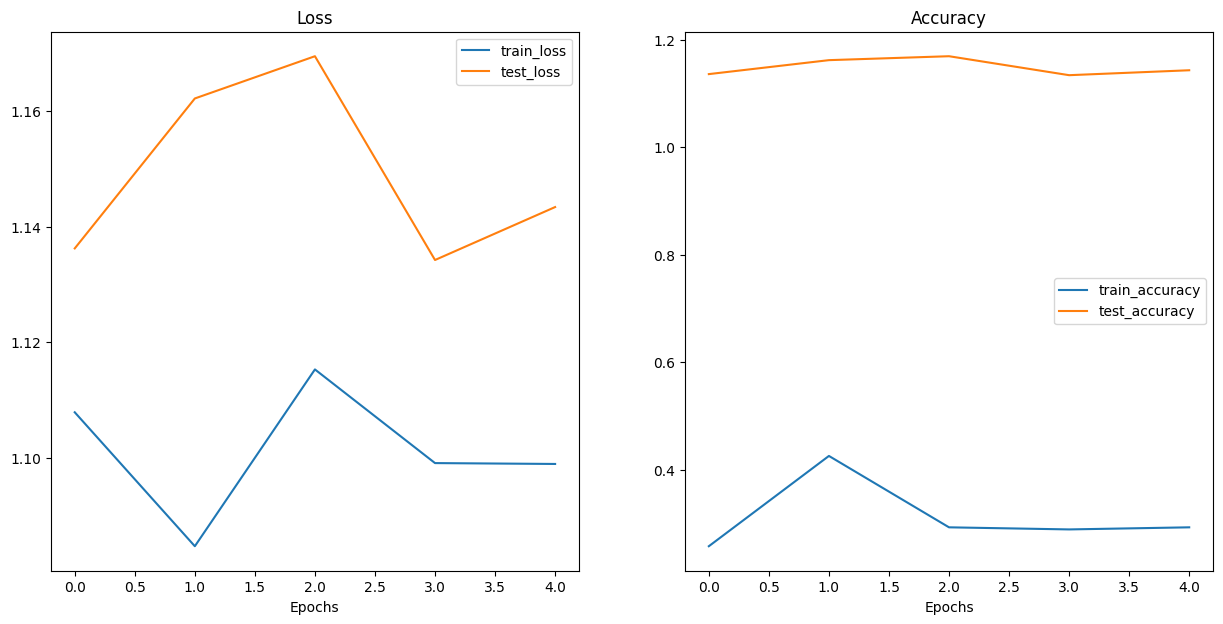

In [ ]:
plot_loss_curves(model_0_results)